In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

In [2]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

2024-03-31 10:46:04.280021: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-31 10:46:04.280203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-31 10:46:06.038142: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-31 10:46:09.337510: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 10:46:19.117737: W tensorflow/comp

Epoch 1/10
16/16 [==============================] - 2s 2ms/step - loss: 0.7158 - accuracy: 0.5437
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7104 - accuracy: 0.5375
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7051 - accuracy: 0.4938
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7002 - accuracy: 0.4875
Epoch 5/10
16/16 [==============================] - 0s 5ms/step - loss: 0.6950 - accuracy: 0.4500
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6901 - accuracy: 0.4625
Epoch 7/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.4625
Epoch 8/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.4750
Epoch 9/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6748 - accuracy: 0.4875
Epoch 10/10
16/16 [==============================] - 0s 3ms/step - loss: 0.6701 - accuracy: 0.4812


In [4]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 8ms/step - loss: 0.6871 - accuracy: 0.3500
Test Accuracy: 0.3499999940395355


Epoch 1/10
13/13 [==============================] - 1s 12ms/step - loss: 0.6688 - accuracy: 0.5234 - val_loss: 0.6523 - val_accuracy: 0.6250
Epoch 2/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6650 - accuracy: 0.5625 - val_loss: 0.6478 - val_accuracy: 0.7188
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6617 - accuracy: 0.6172 - val_loss: 0.6435 - val_accuracy: 0.7188
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6581 - accuracy: 0.6250 - val_loss: 0.6391 - val_accuracy: 0.7188
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6549 - accuracy: 0.6328 - val_loss: 0.6343 - val_accuracy: 0.7188
Epoch 6/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6513 - accuracy: 0.6406 - val_loss: 0.6296 - val_accuracy: 0.7188
Epoch 7/10
13/13 [==============================] - 0s 6ms/step - loss: 0.6478 - accuracy: 0.6406 - val_loss: 0.6253 - val_accuracy: 0.7500
Epoch 8/10
13/13 [=

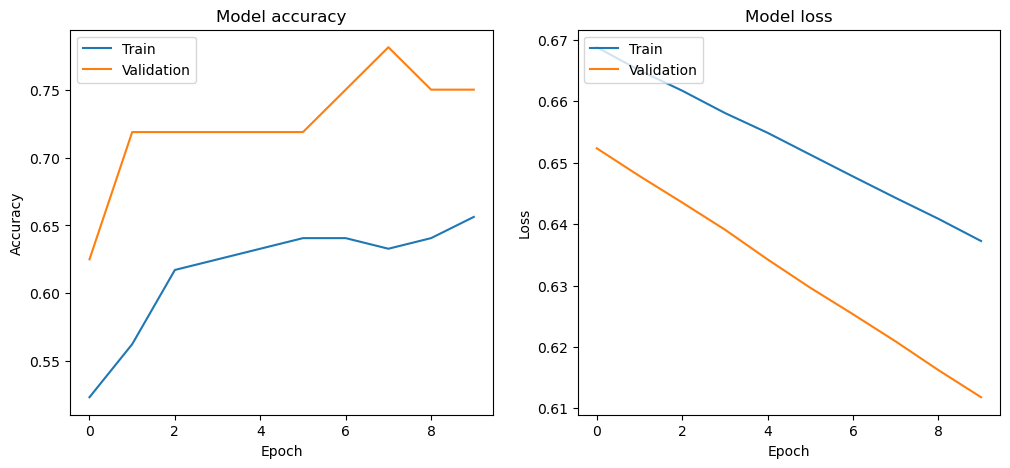

In [5]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

313/313 [==============================] - 1s 1ms/step


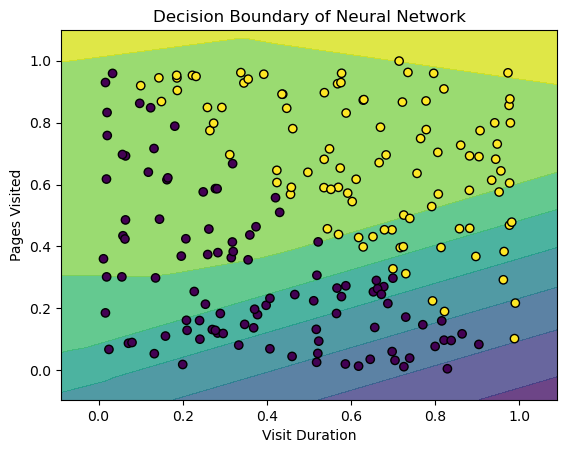

In [6]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()